In [1]:
# Libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as rd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from scipy import stats


In [ ]:
# Project I
# Task I - Data Exploration and Pre-processing
# KV - Pre-processing

# Basic Definitions
dsList = ["KV-PeriodicLoad", "KV-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
target = "ReadsAvg"

# Main
for ds in dsList:
    #Read X, Y raw files
    xRaw = pd.read_csv(dir + ds + "/X.csv", 
                       usecols = lambda column : column not in ["TimeStamp"])
    #print("xRaw:")
    #print(xRaw)

    yRaw = pd.read_csv(dir + ds + "/Y.csv", 
                       usecols = [target])
    #print("yRaw:")
    #print(yRaw)    

    # Removing outliers
    xRawLimited = xRaw[(np.abs(stats.zscore(yRaw))<2).all(axis=1)]
    #print("xRawLimited:")
    #print(xRawLimited)

    yRawLimited = yRaw[(np.abs(stats.zscore(yRaw))<2).all(axis=1)]
    #print("yRawLimited:")
    #print(yRawLimited)

    # Pre-Processing
    xRawNormL2 = preprocessing.normalize(xRawLimited, norm='l2')
    #print("xRawNormL2:")
    #print(xRawNormL2)

    xRawStandard = preprocessing.scale(xRawLimited)
    #print("xRawStandard:")
    #print(xRawStandard)

    xRawRestriction = preprocessing.MinMaxScaler().fit_transform(xRawLimited)
    #print("xRawRestriction:")
    #print(xRawRestriction)

    #Create dataframes and save files
    xLimited = pd.DataFrame(xRawLimited)
    #print("xLimited:")
    #print(xLimited)
    xLimited.to_csv(dir + ds + "/XLimited.csv")

    yLimited = pd.DataFrame(yRawLimited)
    #print("yLimited:")
    #print(yLimited)
    yLimited.to_csv(dir + ds + "/YLimited.csv")

    xNormL2 = pd.DataFrame(xRawNormL2)
    #print("xNormL2:")
    #print(xNormL2)
    xNormL2.to_csv(dir + ds + "/XNormL2.csv")

    xStandard = pd.DataFrame(xRawStandard)
    #print("xStandard:")
    #print(xStandard)
    xStandard.to_csv(dir + ds + "/XStandard.csv")

    xRestricted = pd.DataFrame(xRawRestriction)
    #print("xRestricted:")
    #print(xRestricted)
    xRestricted.to_csv(dir + ds + "/XRestricted.csv")


In [2]:
# Project II
# Task I - Offline learning on small-size training set
# KV - Baseline

# Basic Definitions
dsList = ["KV-PeriodicLoad", "KV-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
outdir = "~/Documentos/kth/project/results/"
target = "ReadsAvg"
iterations = 10

# Main
for ds in dsList:
    print("Dataset: " + ds)

    #Read X, Y raw files
    xRaw = pd.read_csv(dir + ds + "/XSelected.csv", index_col=0, header=0)
    #print("xRaw:")
    #print(xRaw)

    yRaw = pd.read_csv(dir + ds + "/YLimited.csv", usecols = [target])
    #print("yRaw:")
    #print(yRaw) 

    results = pd.DataFrame(columns=['iteration', 'nmae'])

    xTrain, xTest, yTrain, yTest = train_test_split(xRaw, yRaw[target], test_size=0.7)
    #print("xTrain:")
    #print(xTrain)
    #print("xTest:")
    #print(xTest)
    #print("yTrain:")
    #print(yTrain)
    #print("yTest:")
    #print(yTest)
       
    for iter in range (1, iterations+1):
        print("Iteration: " + str(iter))

        # Create a RandomForest Regressor
        regr = RandomForestRegressor(max_depth=10, n_estimators=30, n_jobs=4)

        # Build the Model
        regr.fit(xTrain, yTrain)

        # Do Predictions
        yPredicted = regr.predict(xTest)

        # Calculate NMAE
        nmae  = (abs(yPredicted - yTest).mean())/yTest.mean()
        #print("NMAE: " + str(nmae))

        nr = results.append({'iteration': iter, 'nmae': nmae}, ignore_index=True)
        results = pd.concat([nr])

    results.to_csv(outdir + "p2t1-1-" + ds + ".csv")
    #print(results)


Dataset: KV-PeriodicLoad
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Dataset: KV-FlashcrowdLoad
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10


In [3]:
# Project II
# Task I - Offline learning on small-size training set
# KV - Baseline Statistics

# Basic Definitions
dsList = ["KV-PeriodicLoad", "KV-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
outdir = "~/Documentos/kth/project/results/"
target = "ReadsAvg"

for ds in dsList:
    print("Dataset: " + ds)

    results = pd.read_csv(outdir + "p2t1-1-" + ds + ".csv", index_col=0)
    print(results)

    graphResults = pd.DataFrame(columns=['avg', 'stddev'])

    nr = graphResults.append({'avg': results['nmae'].mean(), 
                              'stddev': results['nmae'].std()}, ignore_index=True)
    graphResults = pd.concat([nr])
    
    print(graphResults)
    graphResults.to_csv(outdir + "p2t1-baseline-" + ds + ".csv")

Dataset: KV-PeriodicLoad
   iteration      nmae
0        1.0  0.036981
1        2.0  0.036981
2        3.0  0.036989
3        4.0  0.036985
4        5.0  0.036967
5        6.0  0.036979
6        7.0  0.036993
7        8.0  0.036991
8        9.0  0.036973
9       10.0  0.036984
        avg    stddev
0  0.036982  0.000008
Dataset: KV-FlashcrowdLoad
   iteration      nmae
0        1.0  0.033470
1        2.0  0.033434
2        3.0  0.033449
3        4.0  0.033464
4        5.0  0.033503
5        6.0  0.033422
6        7.0  0.033437
7        8.0  0.033450
8        9.0  0.033483
9       10.0  0.033516
        avg   stddev
0  0.033463  0.00003


In [ ]:
# Project I
# Task I - Data Exploration and Pre-processing
# KV - Feature Selection

# Basic Definitions
dsList = ["KV-PeriodicLoad", "KV-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
target = "ReadsAvg"
k=16

# Main
for ds in dsList:
    print("Dataset: " + ds)

    #Read X, Y raw files
    xRaw = pd.read_csv(dir + ds + "/XRestricted.csv", index_col=0, header=0)
    #print("xRaw:")
    #print(xRaw)

    yRaw = pd.read_csv(dir + ds + "/YLimited.csv", usecols = [target])
    #print("yRaw:")
    #print(yRaw) 

    #Create a k-feature selector
    selector = SelectKBest(f_classif, k) 

    #Create a RandomForest Regressor 
    regr = RandomForestRegressor(max_depth=50, n_estimators=150, n_jobs=4)

    #Create (X,Y) train and test datasets
    xTrain, xTest, yTrain, yTest = train_test_split(xRaw, yRaw[target], test_size=0.7)

    #Do k-feature selection
    xTrainSelected = selector.fit_transform(xTrain, yTrain)
    xTestSelected = selector.transform(xTest)
    xRawSelected  = np.concatenate((xTrainSelected, xTestSelected))

    xSelected = pd.DataFrame(xRawSelected)
    #print(xSelected)

    xSelected.to_csv(dir + ds + "/XSelected.csv")

    idxsSelected = selector.get_support(indices=True)
    print(idxsSelected)


In [ ]:
# Project II
# Task I - Offline learning on small-size training set
# KV

# Basic Definitions
dsList = ["KV-PeriodicLoad", "KV-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
outdir = "~/Documentos/kth/project/results/"
target = "ReadsAvg"
cacheSizeList = [32, 128, 512, 2048]
testSize = 1000
iterations = 10

# Main
for ds in dsList:
    print("Dataset: " + ds)

    #Read X, Y raw files
    xRaw = pd.read_csv(dir + ds + "/XSelected.csv", index_col=0, header=0)
    #print("xRaw:")
    #print(xRaw)

    yRaw = pd.read_csv(dir + ds + "/YLimited.csv", usecols = [target])
    #print("yRaw:")
    #print(yRaw) 

    results = pd.DataFrame(columns=['cachesize', 'iteration', 'nmae'])

    for cacheSize in cacheSizeList:
        print("Cache Size: " + str(cacheSize))

        xTrain, xTest, yTrain, yTest = train_test_split(xRaw, yRaw[target], 
                                                        test_size=testSize, 
                                                        train_size=cacheSize)
        #print("xTrain:")
        #print(xTrain)
        #print("xTest:")
        #print(xTest)
        #print("yTrain:")
        #print(yTrain)
        #print("yTest:")
        #print(yTest)
       
        for iter in range (1, iterations+1):
            print("Iteration: " + str(iter))

            # Create a RandomForest Regressor
            regr = RandomForestRegressor(max_depth=10, n_estimators=30, n_jobs=4)

            # Build the Model
            regr.fit(xTrain, yTrain)

            # Do Predictions
            yPredicted = regr.predict(xTest)

            # Calculate NMAE
            nmae  = (abs(yPredicted - yTest).mean())/yTest.mean()
            #print("NMAE: " + str(nmae))

            nr = results.append({'cachesize': cacheSize, 'iteration': iter, 'nmae': nmae},  
                                ignore_index=True)
            results = pd.concat([nr])

    results.to_csv(outdir + "p2t1-2-" + ds + ".csv")
    #print(results)


In [ ]:
# Project II
# Task I - Offline learning on small-size training set
# KV

# Basic Definitions
dsList = ["KV-PeriodicLoad", "KV-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
outdir = "~/Documentos/kth/project/results/"
target = "ReadsAvg"
cacheSizeList = [32, 128, 512, 2048]

for ds in dsList:
    print("Dataset: " + ds)

    results = pd.read_csv(outdir + "p2t1-2-" + ds + ".csv", index_col=0)
    print(results)

    graphResults = pd.DataFrame(columns=['cachesize', 'avg', 'stddev'])

    for cacheSize in cacheSizeList:
        print("Cache Size: " + str(cacheSize))

        cacheResults = results[results['cachesize']==cacheSize]
        #print(cacheResults)

        nr = graphResults.append({'cachesize': cacheSize, 'avg': cacheResults['nmae'].mean(), 
                                  'stddev': cacheResults['nmae'].std()}, ignore_index=True)
        graphResults = pd.concat([nr])
    
    print(graphResults)
    graphResults.to_csv(outdir + "p2t1-offline-" + ds + ".csv")


KV-PeriodicLoad:
        avg    stddev
0  0.037866  0.000106
1  0.037421  0.000147
2  0.035969  0.000038
3  0.037338  0.000013
KV-FlashcrowdLoad:
        avg    stddev
0  0.034656  0.000438
1  0.035339  0.000264
2  0.035106  0.000095
3  0.034068  0.000023


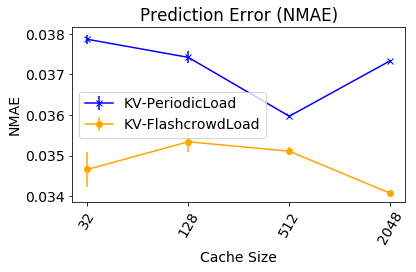

In [10]:
# Project II
# Task I - Offline learning on small-size training set
# KV

# Basic Definitions
font = {'size'   : 14}
plt.rc('font', **font)
outdir = "~/Documentos/kth/project/results/"
cacheSizeList = [32, 128, 512, 2048]

dfKVPeriodicLoad = pd.read_csv(outdir + "p2t1-offline-KV-PeriodicLoad.csv", index_col=None, 
                               usecols = ["avg", "stddev"], header=0)    
print("KV-PeriodicLoad:")
print(dfKVPeriodicLoad)

dfKVFlashcrowdLoad = pd.read_csv(outdir + "p2t1-offline-KV-FlashcrowdLoad.csv", index_col=None, 
                                 usecols = ["avg", "stddev"], header=0)   
print("KV-FlashcrowdLoad:")
print(dfKVFlashcrowdLoad)

plt.title("Prediction Error (NMAE)")
#plt.suptitle(hostname)
    
#plt.ylim((0.03, 0.05))
#plt.yticks([0.03, 0.035, 0.04, 0.045, 0.05], [0.03, 0.035, 0.04, 0.045, 0.05])

x  = np.array(cacheSizeList)

yKVPL = np.array(dfKVPeriodicLoad["avg"])
yKVFL = np.array(dfKVFlashcrowdLoad["avg"])

errorKVPL = np.array(dfKVPeriodicLoad["stddev"])
errorKVFL = np.array(dfKVFlashcrowdLoad["stddev"])

#plt.fill_between(x, yRS - errorRS, yRS + errorRS, alpha=0.4, color = "blue")
#plt.fill_between(x, yRRFS - errorRRFS, yRRFS + errorRRFS, alpha=0.4, color = "orange")

plt.errorbar(x, yKVPL, yerr=errorKVPL, marker='x', label='KV-PeriodicLoad', color = "blue")
plt.errorbar(x, yKVFL, yerr=errorKVFL, marker='o', label='KV-FlashcrowdLoad', color = "orange")

#plt.plot(x, yRS, marker='x', label='RS', color = "blue")
#plt.plot(x, yRRFS, marker='o', label='RR-SS', color = "orange")

plt.xlabel("Cache Size")
plt.xscale('log', basex=2)
plt.xticks(x, x, rotation=60)

plt.ylabel("NMAE")
plt.legend(loc='best')
#plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left')
plt.tight_layout()
plt.show()



In [4]:
# Project II
# Task I - Offline learning on small-size training set
# KV
# RR-SS

# Basic Definitions
dsList = ["KV-PeriodicLoad", "KV-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
outdir = "~/Documentos/kth/project/results/"
target = "ReadsAvg"
cacheSizeList = [32, 128, 512, 2048]
seqSize = 5000
testSize = 1000
iterations = 10

# Main
for ds in dsList:
    print("Dataset: " + ds)

    #Read X, Y raw files
    xRaw = pd.read_csv(dir + ds + "/XSelected.csv", index_col=0, header=0)
    #print("xRaw:")
    #print(xRaw)

    yRaw = pd.read_csv(dir + ds + "/YLimited.csv", usecols = [target])
    #print("yRaw:")
    #print(yRaw) 

    # Total size of the dataset
    dsSize = len(xRaw.index)

    results = pd.DataFrame(columns=['cachesize', 'iteration', 'nmae'])

    for iter in range(1, iterations+1):
        print("Iteration: " + str(iter))

        for cacheSize in cacheSizeList:
            print("Cache Size: " + str(cacheSize))

            init = rd.randint(0, dsSize//2)
            #print("Init: ")
            #print(init)

            # Define (X,Y) cache of size cacheSize
            cacheX = xRaw.iloc[init:(init+cacheSize), 0:]
            #print("cacheX:")
            #print(cacheX)
            
            cacheY = yRaw.iloc[init:(init+cacheSize), 0:2]
            #print("cacheY:")
            #print(cacheY)

            # Rebuild indexes
            cacheX = cacheX.reset_index(drop=True)
            cacheY = cacheY.reset_index(drop=True)
            #print("cacheX:")
            #print(cacheX)

            # Define a sample vector with the average of all columns in the cache
            cacheAvgSample = pd.DataFrame(cacheX.mean()).transpose()
            #print("cacheAvgSample:")
            #print(cacheAvgSample)

            # Define a vector with the redundancy values between all samples in the cache
            # and the sample vector with the average of all columns
            cacheRedundancyValues = cosine_similarity(cacheX, cacheAvgSample)
            #print("cacheRedundancyValues:")
            #print(cacheRedundancyValues)

            # Define a vector with the relevance values between all samples in the cache
            # and the sample vector with the average of all columns
            cacheRelevanceValues = euclidean_distances(cacheX, cacheAvgSample)
            #print("cacheRelevanceValues:")
            #print(cacheRelevanceValues)

            # Define a vector with the rank between all samples in the cache
            # and the sample vector with the average of all columns
            cacheRankValues = cacheRelevanceValues/cacheRedundancyValues
            #print("cacheRankValues:")
            #print(pd.DataFrame(cacheRankValues).sort_values(by=0))

            # Define the mean value of the rank vector
            cacheRankAvg = pd.DataFrame(cacheRankValues).mean()
            #print("cacheRankMean:")
            #print(cacheRankMean[0])

            # Build a RF regressor and Fit the model 
            regr = RandomForestRegressor(max_depth=10, n_estimators=30, n_jobs=4)
            #print ("Build Model Ok!")

            for index in range(init+cacheSize, init+cacheSize+seqSize):
                sampleX = xRaw.iloc[index:(index + 1), 0:]
                sampleY = yRaw.iloc[index:(index + 1), 0:2]
                #print("sampleX #" + str(index))
                #print(sampleX)

                sampleRedundancy = cosine_similarity(cacheAvgSample, sampleX)
                #print(sampleRedundancy)

                sampleRelevance = euclidean_distances(cacheAvgSample, sampleX)
                #print(sampleRelevance)

                sampleRank = sampleRelevance/sampleRedundancy
                #print("sampleRank)

                if (sampleRank[0][0] > cacheRankAvg[0]):
                #print("Sample#" + str(index) + ": Insert")

                    # Find the index of the sample with the minimum rank in the cache
                    idxMinCache = pd.DataFrame(cacheRankValues).idxmin().values[0]
                    #print(idxMinCache)

                    # Remove idxMinCache sample from the cache
                    #print(cacheX.iloc[idxMinCache])
                    cacheX = cacheX.drop([idxMinCache])
                    cacheY = cacheY.drop([idxMinCache])

                    # Rebuild indexes
                    #cacheX = cacheX.reset_index(drop=True)
                    #cacheY = cacheY.reset_index(drop=True)

                    # Insert the new sample in the cache      
                    cacheX = pd.concat([sampleX, cacheX], ignore_index=True, sort=True)
                    cacheY = pd.concat([sampleY, cacheY], ignore_index=True, sort=True)
                            
                    # Rebuild indexes
                    cacheX = cacheX.reset_index(drop=True)
                    cacheY = cacheY.reset_index(drop=True)

                    # Update the sample vector with the average of all columns in the cache
                    cacheAvgSample = pd.DataFrame(cacheX.mean()).transpose()
                    #print(cacheAvgSample)

                    # Update the vector with the redundancy values between all samples in the cache
                    # and the sample vector with the average of all columns
                    cacheRedundancyValues = cosine_similarity(cacheX, cacheAvgSample)
                    #print(cacheRedundancyValues)

                    # Update the vector with the relevance values between all samples in the cache
                    # and the sample vector with the average of all columns
                    cacheRelevanceValues = euclidean_distances(cacheX, cacheAvgSample)
                    #print(cacheRelevanceValues)

                    # Update the vector with the rank between all samples in the cache
                    # and the sample vector with the average of all columns
                    cacheRankValues = cacheRelevanceValues/cacheRedundancyValues
                    #print(cacheRankValues)
                    #print(pd.DataFrame(cacheRankValues).sort_values(by=0))

                    # Update the average value of the rank vector
                    cacheRankAvg = pd.DataFrame(cacheRankValues).mean()
                    #print(cacheRankMedian)
            
            # Build the Model
            regr.fit(cacheX, cacheY)

            #print("TestIndex: " + str(index))
            
            # Defining (X,Y) test dataset for next predictions
            testX = xRaw.iloc[index:(index+testSize), 0:]
            testY = yRaw.iloc[index:(index+testSize), 0:2]
            #print("testX:")
            #print(testX)
            #print("testY:")
            #print(testY)

            # Do Predictions
            predictedY = regr.predict(testX)

            #print("predictedY:")
            #print(predictedY)
            #print("testY:")
            #print(testY.values.ravel())

            # Calculate NMAE
            nmae  = (abs(predictedY - testY.values.ravel()).mean())/(testY.values.ravel().mean())
            #print("NMAE: " + str(nmae))

            nr = results.append({'cachesize': cacheSize, 'iteration': iter, 'nmae': nmae},  
                                    ignore_index=True)
            results = pd.concat([nr])
    results.to_csv(outdir + "p2t1-3-" + ds + ".csv")






Dataset: KV-PeriodicLoad
Iteration: 1
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 2
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 3
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 4
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 5
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 6
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 7
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 8
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 9
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 10
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Dataset: KV-FlashcrowdLoad
Iteration: 1
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 2
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 3
Cache Size

In [5]:
# Project II
# Task I - Offline learning on small-size training set
# KV

# Basic Definitions
dsList = ["KV-PeriodicLoad", "KV-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
outdir = "~/Documentos/kth/project/results/"
target = "ReadsAvg"
cacheSizeList = [32, 128, 512, 2048]

for ds in dsList:
    print("Dataset: " + ds)

    results = pd.read_csv(outdir + "p2t1-3-" + ds + ".csv", index_col=0)
    print(results)

    graphResults = pd.DataFrame(columns=['cachesize', 'avg', 'stddev'])

    for cacheSize in cacheSizeList:
        print("Cache Size: " + str(cacheSize))

        cacheResults = results[results['cachesize']==cacheSize]
        #print(cacheResults)

        nr = graphResults.append({'cachesize': cacheSize, 'avg': cacheResults['nmae'].mean(), 
                                  'stddev': cacheResults['nmae'].std()}, ignore_index=True)
        graphResults = pd.concat([nr])
    
    print(graphResults)
    graphResults.to_csv(outdir + "p2t1-rrss-" + ds + ".csv")

Dataset: KV-PeriodicLoad
    cachesize  iteration      nmae
0        32.0        1.0  0.027222
1       128.0        1.0  0.021414
2       512.0        1.0  0.043470
3      2048.0        1.0  0.039417
4        32.0        2.0  0.040444
5       128.0        2.0  0.032998
6       512.0        2.0  0.025107
7      2048.0        2.0  0.031184
8        32.0        3.0  0.016335
9       128.0        3.0  0.044664
10      512.0        3.0  0.042169
11     2048.0        3.0  0.042589
12       32.0        4.0  0.017665
13      128.0        4.0  0.034462
14      512.0        4.0  0.055565
15     2048.0        4.0  0.049749
16       32.0        5.0  0.044417
17      128.0        5.0  0.019483
18      512.0        5.0  0.037017
19     2048.0        5.0  0.035160
20       32.0        6.0  0.032389
21      128.0        6.0  0.046177
22      512.0        6.0  0.050055
23     2048.0        6.0  0.034630
24       32.0        7.0  0.027424
25      128.0        7.0  0.024645
26      512.0        7.0  0.02

KV-PeriodicLoad:
        avg    stddev
0  0.031154  0.009390
1  0.033643  0.011475
2  0.039596  0.012767
3  0.038332  0.006536
KV-FlashcrowdLoad:
        avg    stddev
0  0.032076  0.007203
1  0.034912  0.008374
2  0.031800  0.005100
3  0.032963  0.003188


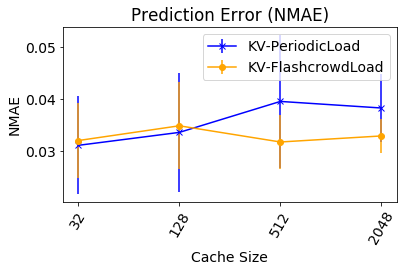

In [6]:
# Project II
# Task I - Offline learning on small-size training set
# KV

# Basic Definitions
font = {'size'   : 14}
plt.rc('font', **font)
outdir = "~/Documentos/kth/project/results/"
cacheSizeList = [32, 128, 512, 2048]

dfVoDPeriodicLoad = pd.read_csv(outdir + "p2t1-rrss-KV-PeriodicLoad.csv", index_col=None, 
                                usecols = ["avg", "stddev"], header=0)    
print("KV-PeriodicLoad:")
print(dfVoDPeriodicLoad)

dfVoDFlashcrowdLoad = pd.read_csv(outdir + "p2t1-rrss-KV-FlashcrowdLoad.csv", index_col=None, 
                                  usecols = ["avg", "stddev"], header=0)   
print("KV-FlashcrowdLoad:")
print(dfVoDFlashcrowdLoad)

plt.title("Prediction Error (NMAE)")
#plt.suptitle(hostname)
    
#plt.ylim((0.03, 0.05))
#plt.yticks([0.03, 0.035, 0.04, 0.045, 0.05], [0.03, 0.035, 0.04, 0.045, 0.05])

x  = np.array(cacheSizeList)

yVoDPL = np.array(dfVoDPeriodicLoad["avg"])
yVoDFL = np.array(dfVoDFlashcrowdLoad["avg"])

errorVoDPL = np.array(dfVoDPeriodicLoad["stddev"])
errorVoDFL = np.array(dfVoDFlashcrowdLoad["stddev"])

#plt.fill_between(x, yRS - errorRS, yRS + errorRS, alpha=0.4, color = "blue")
#plt.fill_between(x, yRRFS - errorRRFS, yRRFS + errorRRFS, alpha=0.4, color = "orange")

plt.errorbar(x, yVoDPL, yerr=errorVoDPL, marker='x', label='KV-PeriodicLoad', color = "blue")
plt.errorbar(x, yVoDFL, yerr=errorVoDFL, marker='o', label='KV-FlashcrowdLoad', color = "orange")

#plt.plot(x, yRS, marker='x', label='RS', color = "blue")
#plt.plot(x, yRRFS, marker='o', label='RR-SS', color = "orange")

plt.xlabel("Cache Size")
plt.xscale('log', basex=2)
plt.xticks(x, x, rotation=60)

plt.ylabel("NMAE")
plt.legend(loc='best')
#plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left')
plt.tight_layout()
plt.show()


KV-PeriodicLoad - Baseline:
        avg    stddev
0  0.036982  0.000008
KV-PeriodicLoad - Offline:
        avg    stddev
0  0.037866  0.000106
1  0.037421  0.000147
2  0.035969  0.000038
3  0.037338  0.000013
KV-PeriodicLoad - RRSS:
        avg    stddev
0  0.031154  0.009390
1  0.033643  0.011475
2  0.039596  0.012767
3  0.038332  0.006536


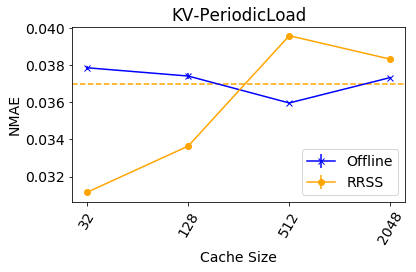

KV-FlashcrowdLoad - Baseline:
        avg   stddev
0  0.033463  0.00003
KV-FlashcrowdLoad - Offline:
        avg    stddev
0  0.034656  0.000438
1  0.035339  0.000264
2  0.035106  0.000095
3  0.034068  0.000023
KV-FlashcrowdLoad - RRSS:
        avg    stddev
0  0.032076  0.007203
1  0.034912  0.008374
2  0.031800  0.005100
3  0.032963  0.003188


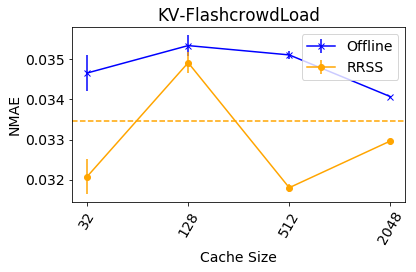

In [5]:
# Project II
# Task I - Offline learning on small-size training set
# KV - Final Results

# Basic Definitions
font = {'size'   : 14}
plt.rc('font', **font)
outdir = "~/Documentos/kth/project/results/"
savedir = "/home/rodolfo/Documentos/kth/project/results/"
cacheSizeList = [32, 128, 512, 2048]
dsList = ["KV-PeriodicLoad", "KV-FlashcrowdLoad"]

for ds in dsList:

    dfBaseline = pd.read_csv(outdir + "p2t1-baseline-" + ds + ".csv", index_col=None, 
                             usecols = ["avg", "stddev"], header=0)    
    print(ds + " - Baseline:")
    print(dfBaseline)

    dfOffline = pd.read_csv(outdir + "p2t1-offline-" + ds + ".csv", index_col=None, 
                            usecols = ["avg", "stddev"], header=0)   
    print(ds + " - Offline:")
    print(dfOffline)

    dfRRSS = pd.read_csv(outdir + "p2t1-rrss-" + ds + ".csv", index_col=None, 
                         usecols = ["avg", "stddev"], header=0)    
    print(ds + " - RRSS:")
    print(dfRRSS)

    #plt.suptitle("Prediction Error (NMAE)")
    plt.title(ds)
    
    #plt.ylim((0.03, 0.05))
    #plt.yticks([0.03, 0.035, 0.04, 0.045, 0.05], [0.03, 0.035, 0.04, 0.045, 0.05])

    x  = np.array(cacheSizeList)

    yBaseline = np.array(dfBaseline["avg"])
    yOffline = np.array(dfOffline["avg"])
    yRRSS = np.array(dfRRSS["avg"])

    errorBaseline = np.array(dfBaseline["stddev"])
    errorOffline = np.array(dfOffline["stddev"])
    errorRRSS = np.array(dfOffline["stddev"])

    #plt.fill_between(x, yRS - errorRS, yRS + errorRS, alpha=0.4, color = "blue")
    #plt.fill_between(x, yRRFS - errorRRFS, yRRFS + errorRRFS, alpha=0.4, color = "orange")

    plt.errorbar(x, yOffline, yerr=errorOffline, marker='x', label='Offline', color = "blue")
    plt.errorbar(x, yRRSS, yerr=errorRRSS, marker='o', label='RRSS', color = "orange")
    plt.axhline(yBaseline, linestyle ="--", color = "orange")

    #plt.plot(x, yRS, marker='x', label='RS', color = "blue")
    #plt.plot(x, yRRFS, marker='o', label='RR-SS', color = "orange")

    plt.xlabel("Cache Size")
    plt.xscale('log', basex=2)
    plt.xticks(x, x, rotation=60)

    plt.ylabel("NMAE")
    plt.legend(loc='best')
    #plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left')
    plt.tight_layout()
    plt.show()
    filename = savedir + "p1t1-" + ds + ".png"
    #print(filename)
    #plt.savefig(filename)
    plt.close()


In [6]:
# Project II
# Task II - Online learning on a small-size training set
# KV - RRSS

# Basic Definitions
dsList = ["KV-PeriodicLoad", "KV-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
outdir = "~/Documentos/kth/project/results/"
target = "ReadsAvg"
cacheSizeList = [32, 128, 512, 2048]
seqSize = 1000
iterations = 10

# Main
for ds in dsList:
    print("Dataset: " + ds)

    #Read X, Y raw files
    xRaw = pd.read_csv(dir + ds + "/XSelected.csv", index_col=0, header=0)
    #print("xRaw:")
    #print(xRaw)

    yRaw = pd.read_csv(dir + ds + "/YLimited.csv", usecols = [target])
    #print("yRaw:")
    #print(yRaw) 

    # Total size of the dataset
    dsSize = len(xRaw.index)

    results = pd.DataFrame(columns=['cachesize', 'iteration', 'nmae'])

    for iter in range(1, iterations+1):
        print("Iteration: " + str(iter))

        for cacheSize in cacheSizeList:
            print("Cache Size: " + str(cacheSize))

            init = rd.randint(0, dsSize//2)
            #print("Init: ")
            #print(init)

            # Define (X,Y) cache of size cacheSize
            cacheX = xRaw.iloc[init:(init+cacheSize), 0:]
            #print("cacheX:")
            #print(cacheX)
            
            cacheY = yRaw.iloc[init:(init+cacheSize), 0:2]
            #print("cacheY:")
            #print(cacheY)

            # Rebuild indexes
            cacheX = cacheX.reset_index(drop=True)
            cacheY = cacheY.reset_index(drop=True)
            #print("cacheX:")
            #print(cacheX)

            # Define a sample vector with the average of all columns in the cache
            cacheAvgSample = pd.DataFrame(cacheX.mean()).transpose()
            #print("cacheAvgSample:")
            #print(cacheAvgSample)

            # Define a vector with the redundancy values between all samples in the cache
            # and the sample vector with the average of all columns
            cacheRedundancyValues = cosine_similarity(cacheX, cacheAvgSample)
            #print("cacheRedundancyValues:")
            #print(cacheRedundancyValues)

            # Define a vector with the relevance values between all samples in the cache
            # and the sample vector with the average of all columns
            cacheRelevanceValues = euclidean_distances(cacheX, cacheAvgSample)
            #print("cacheRelevanceValues:")
            #print(cacheRelevanceValues)

            # Define a vector with the rank between all samples in the cache
            # and the sample vector with the average of all columns
            cacheRankValues = cacheRelevanceValues/cacheRedundancyValues
            #print("cacheRankValues:")
            #print(pd.DataFrame(cacheRankValues).sort_values(by=0))

            # Define the mean value of the rank vector
            cacheRankAvg = pd.DataFrame(cacheRankValues).mean()
            #print("cacheRankMean:")
            #print(cacheRankMean[0])

            # Build a RF regressor and Fit the model 
            regr = RandomForestRegressor(max_depth=10, n_estimators=30, n_jobs=4)
            #print ("Build Model Ok!")

            for index in range(init+cacheSize, init+cacheSize+seqSize):
                sampleX = xRaw.iloc[index:(index + 1), 0:]
                sampleY = yRaw.iloc[index:(index + 1), 0:2]
                #print("sampleX #" + str(index))
                #print(sampleX)

                sampleRedundancy = cosine_similarity(cacheAvgSample, sampleX)
                #print(sampleRedundancy)

                sampleRelevance = euclidean_distances(cacheAvgSample, sampleX)
                #print(sampleRelevance)

                sampleRank = sampleRelevance/sampleRedundancy
                #print("sampleRank)

                if (sampleRank[0][0] > cacheRankAvg[0]):
                #print("Sample#" + str(index) + ": Insert")

                    # Find the index of the sample with the minimum rank in the cache
                    idxMinCache = pd.DataFrame(cacheRankValues).idxmin().values[0]
                    #print(idxMinCache)

                    # Remove idxMinCache sample from the cache
                    #print(cacheX.iloc[idxMinCache])
                    cacheX = cacheX.drop([idxMinCache])
                    cacheY = cacheY.drop([idxMinCache])

                    # Rebuild indexes
                    #cacheX = cacheX.reset_index(drop=True)
                    #cacheY = cacheY.reset_index(drop=True)

                    # Insert the new sample in the cache      
                    cacheX = pd.concat([sampleX, cacheX], ignore_index=True, sort=True)
                    cacheY = pd.concat([sampleY, cacheY], ignore_index=True, sort=True)
                            
                    # Rebuild indexes
                    cacheX = cacheX.reset_index(drop=True)
                    cacheY = cacheY.reset_index(drop=True)

                    # Update the sample vector with the average of all columns in the cache
                    cacheAvgSample = pd.DataFrame(cacheX.mean()).transpose()
                    #print(cacheAvgSample)

                    # Update the vector with the redundancy values between all samples in the cache
                    # and the sample vector with the average of all columns
                    cacheRedundancyValues = cosine_similarity(cacheX, cacheAvgSample)
                    #print(cacheRedundancyValues)

                    # Update the vector with the relevance values between all samples in the cache
                    # and the sample vector with the average of all columns
                    cacheRelevanceValues = euclidean_distances(cacheX, cacheAvgSample)
                    #print(cacheRelevanceValues)

                    # Update the vector with the rank between all samples in the cache
                    # and the sample vector with the average of all columns
                    cacheRankValues = cacheRelevanceValues/cacheRedundancyValues
                    #print(cacheRankValues)
                    #print(pd.DataFrame(cacheRankValues).sort_values(by=0))

                    # Update the average value of the rank vector
                    cacheRankAvg = pd.DataFrame(cacheRankValues).mean()
                    #print(cacheRankMedian)
            
            # Build the Model
            regr.fit(cacheX, cacheY)

            #print("TestIndex: " + str(index))
            
            # Defining (X,Y) test dataset for next predictions
            testX = xRaw.iloc[index:dsSize, 0:]
            testY = yRaw.iloc[index:dsSize, 0:2]
            #print("testX:")
            #print(testX)
            #print("testY:")
            #print(testY)

            # Do Predictions
            predictedY = regr.predict(testX)

            #print("predictedY:")
            #print(predictedY)
            #print("testY:")
            #print(testY.values.ravel())

            # Calculate NMAE
            nmae  = (abs(predictedY - testY.values.ravel()).mean())/(testY.values.ravel().mean())
            print("NMAE: " + str(nmae))

            nr = results.append({'cachesize': cacheSize, 'iteration': iter, 'nmae': nmae},  
                                    ignore_index=True)
            results = pd.concat([nr])
    print(results)
    results.to_csv(outdir + "p2t2-1-" + ds + ".csv")



Dataset: KV-PeriodicLoad
Iteration: 1
Cache Size: 32
NMAE: 0.0379846406820269
Cache Size: 128
NMAE: 0.05160698052349365
Cache Size: 512
NMAE: 0.04540873108943095
Cache Size: 2048
NMAE: 0.03589661620570251
Iteration: 2
Cache Size: 32
NMAE: 0.05673391460572765
Cache Size: 128
NMAE: 0.05636340209123521
Cache Size: 512
NMAE: 0.03628185699639365
Cache Size: 2048
NMAE: 0.03609276620510711
Iteration: 3
Cache Size: 32
NMAE: 0.036173948464719274
Cache Size: 128
NMAE: 0.04991345454332545
Cache Size: 512
NMAE: 0.05225806858226574
Cache Size: 2048
NMAE: 0.03620157792078633
Iteration: 4
Cache Size: 32
NMAE: 0.03977010278522893
Cache Size: 128
NMAE: 0.035569658775728645
Cache Size: 512
NMAE: 0.043894463669933916
Cache Size: 2048
NMAE: 0.03639303639312945
Iteration: 5
Cache Size: 32
NMAE: 0.04832433146567038
Cache Size: 128
NMAE: 0.05390690815346603
Cache Size: 512
NMAE: 0.04041083441941804
Cache Size: 2048
NMAE: 0.03837646297715303
Iteration: 6
Cache Size: 32
NMAE: 0.06068321844404441
Cache Size: 12

In [7]:
# Project II
# Task II - Online learning on a small-size training set
# VoD - RS

# Basic Definitions
dsList = ["KV-PeriodicLoad", "KV-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
outdir = "~/Documentos/kth/project/results/"
target = "ReadsAvg"
cacheSizeList = [32, 128, 512, 2048]
seqSize = 1000
iterations = 10

# Main
for ds in dsList:
    print("Dataset: " + ds)

    #Read X, Y raw files
    xRaw = pd.read_csv(dir + ds + "/XSelected.csv", index_col=0, header=0)
    #print("xRaw:")
    #print(xRaw)

    yRaw = pd.read_csv(dir + ds + "/YLimited.csv", usecols = [target])
    #print("yRaw:")
    #print(yRaw) 

    # Total size of the dataset
    dsSize = len(xRaw.index)

    results = pd.DataFrame(columns=['cachesize', 'iteration', 'nmae'])

    for iter in range(1, iterations+1):
        print("Iteration: " + str(iter))

        for cacheSize in cacheSizeList:
            print("Cache Size: " + str(cacheSize))

            init = rd.randint(0, dsSize//2)
            #print("Init: ")
            #print(init)

            # Define (X,Y) cache of size cacheSize
            cacheX = xRaw.iloc[init:(init+cacheSize), 0:]
            #print("cacheX:")
            #print(cacheX)
            
            cacheY = yRaw.iloc[init:(init+cacheSize), 0:2]
            #print("cacheY:")
            #print(cacheY)

            # Rebuild indexes
            cacheX = cacheX.reset_index(drop=True)
            cacheY = cacheY.reset_index(drop=True)
            #print("cacheX:")
            #print(cacheX)

            # Build a RF regressor and Fit the model 
            regr = RandomForestRegressor(max_depth=10, n_estimators=30, n_jobs=4)
            #print ("Build Model Ok!")

            for index in range(init+cacheSize, init+cacheSize+seqSize):
                #print(index-init+1)
                irs = rd.randint(0, index-init)

                sampleX = xRaw.iloc[index:(index + 1), 0:]
                sampleY = yRaw.iloc[index:(index + 1), 0:2]
                #print("sampleX #" + str(index))
                #print(sampleX)

                if (irs < cacheSize):
                    #print("Sample#" + str(index) + ": Insert")

                    cacheX = cacheX.drop([irs])
                    cacheY = cacheY.drop([irs])

                    # Rebuild indexes
                    cacheX = cacheX.reset_index(drop=True)
                    cacheY = cacheY.reset_index(drop=True)

                    # Insert the new sample in the cache      
                    cacheX = pd.concat([sampleX, cacheX], ignore_index=True, sort=True)
                    cacheY = pd.concat([sampleY, cacheY], ignore_index=True, sort=True)
                            
                    # Rebuild indexes
                    cacheX = cacheX.reset_index(drop=True)
                    cacheY = cacheY.reset_index(drop=True)
            
            # Build the Model
            regr.fit(cacheX, cacheY)

            #print("TestIndex: " + str(index))
            
            # Defining (X,Y) test dataset for next predictions
            testX = xRaw.iloc[index:dsSize, 0:]
            testY = yRaw.iloc[index:dsSize, 0:2]
            #print("testX:")
            #print(testX)
            #print("testY:")
            #print(testY)

            # Do Predictions
            predictedY = regr.predict(testX)

            #print("predictedY:")
            #print(predictedY)
            #print("testY:")
            #print(testY.values.ravel())

            # Calculate NMAE
            nmae  = (abs(predictedY - testY.values.ravel()).mean())/(testY.values.ravel().mean())
            #print("NMAE: " + str(nmae))

            nr = results.append({'cachesize': cacheSize, 'iteration': iter, 'nmae': nmae},  
                                    ignore_index=True)
            results = pd.concat([nr])
    print(results)
    results.to_csv(outdir + "p2t2-2-" + ds + ".csv")



Dataset: KV-PeriodicLoad
Iteration: 1
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 2
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 3
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 4
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 5
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 6
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 7
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 8
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 9
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 10
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
    cachesize  iteration      nmae
0        32.0        1.0  0.045955
1       128.0        1.0  0.037720
2       512.0        1.0  0.040023
3      2048.0        1.0  0.036329
4        32.0        2.0  0.0

In [8]:
# Project II
# Task II - Online learning on a small-size training set
# KV - Statistics 

# Basic Definitions
dsList = ["KV-PeriodicLoad", "KV-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
outdir = "~/Documentos/kth/project/results/"
target = "ReadsAvg"
cacheSizeList = [32, 128, 512, 2048]

for ds in dsList:
    print("Dataset: " + ds)

    results = pd.read_csv(outdir + "p2t2-1-" + ds + ".csv", index_col=0)
    print(results)

    graphResults = pd.DataFrame(columns=['cachesize', 'avg', 'stddev'])

    for cacheSize in cacheSizeList:
        print("Cache Size: " + str(cacheSize))

        cacheResults = results[results['cachesize']==cacheSize]
        #print(cacheResults)

        nr = graphResults.append({'cachesize': cacheSize, 'avg': cacheResults['nmae'].mean(), 
                                  'stddev': cacheResults['nmae'].std()}, ignore_index=True)
        graphResults = pd.concat([nr])
    
    print(graphResults)
    graphResults.to_csv(outdir + "p2t2-rrss-" + ds + ".csv")

for ds in dsList:
    print("Dataset: " + ds)

    results = pd.read_csv(outdir + "p2t2-2-" + ds + ".csv", index_col=0)
    print(results)

    graphResults = pd.DataFrame(columns=['cachesize', 'avg', 'stddev'])

    for cacheSize in cacheSizeList:
        print("Cache Size: " + str(cacheSize))

        cacheResults = results[results['cachesize']==cacheSize]
        #print(cacheResults)

        nr = graphResults.append({'cachesize': cacheSize, 'avg': cacheResults['nmae'].mean(), 
                                  'stddev': cacheResults['nmae'].std()}, ignore_index=True)
        graphResults = pd.concat([nr])
    
    print(graphResults)
    graphResults.to_csv(outdir + "p2t2-rs-" + ds + ".csv")

Dataset: KV-PeriodicLoad
    cachesize  iteration      nmae
0        32.0        1.0  0.037985
1       128.0        1.0  0.041607
2       512.0        1.0  0.045409
3      2048.0        1.0  0.035897
4        32.0        2.0  0.046734
5       128.0        2.0  0.050363
6       512.0        2.0  0.036282
7      2048.0        2.0  0.036093
8        32.0        3.0  0.036174
9       128.0        3.0  0.049913
10      512.0        3.0  0.042258
11     2048.0        3.0  0.036202
12       32.0        4.0  0.039770
13      128.0        4.0  0.035570
14      512.0        4.0  0.043894
15     2048.0        4.0  0.036393
16       32.0        5.0  0.048324
17      128.0        5.0  0.043907
18      512.0        5.0  0.040411
19     2048.0        5.0  0.038376
20       32.0        6.0  0.050683
21      128.0        6.0  0.045413
22      512.0        6.0  0.050534
23     2048.0        6.0  0.036818
24       32.0        7.0  0.036910
25      128.0        7.0  0.041538
26      512.0        7.0  0.04

In [11]:
# Project II
# Task II - Online learning on a small-size training set
# KV - Final Results

# Basic Definitions
font = {'size'   : 14}
plt.rc('font', **font)
outdir = "~/Documentos/kth/project/results/"
savedir = "/home/rodolfo/Documentos/kth/project/results/"
cacheSizeList = [32, 128, 512, 2048]
dsList = ["KV-PeriodicLoad", "KV-FlashcrowdLoad"]

for ds in dsList:

    dfBaseline = pd.read_csv(outdir + "p2t1-baseline-" + ds + ".csv", index_col=None, 
                             usecols = ["avg", "stddev"], header=0)    
    print(ds + " - Baseline:")
    print(dfBaseline)

    dfRS = pd.read_csv(outdir + "p2t2-rs-" + ds + ".csv", index_col=None, 
                            usecols = ["avg", "stddev"], header=0)   
    print(ds + " - RS:")
    print(dfOffline)

    dfRRSS = pd.read_csv(outdir + "p2t2-rrss-" + ds + ".csv", index_col=None, 
                         usecols = ["avg", "stddev"], header=0)    
    print(ds + " - RRSS:")
    print(dfRRSS)

    #plt.suptitle("Prediction Error (NMAE)")
    plt.title(ds)
    
    #plt.ylim((0.03, 0.05))
    #plt.yticks([0.03, 0.035, 0.04, 0.045, 0.05], [0.03, 0.035, 0.04, 0.045, 0.05])

    x  = np.array(cacheSizeList)

    yBaseline = np.array(dfBaseline["avg"])
    yRS = np.array(dfRS["avg"])
    yRRSS = np.array(dfRRSS["avg"])

    errorBaseline = np.array(dfBaseline["stddev"])
    errorRS = np.array(dfRS["stddev"])
    errorRRSS = np.array(dfRRSS["stddev"])

    #plt.fill_between(x, yRS - errorRS, yRS + errorRS, alpha=0.4, color = "blue")
    #plt.fill_between(x, yRRFS - errorRRFS, yRRFS + errorRRFS, alpha=0.4, color = "orange")

    plt.errorbar(x, yRS, yerr=errorRS, marker='x', label='RS', color = "blue")
    plt.errorbar(x, yRRSS, yerr=errorRRSS, marker='o', label='RRSS', color = "orange")
    plt.axhline(yBaseline, linestyle ="--", color = "orange")

    #plt.plot(x, yRS, marker='x', label='RS', color = "blue")
    #plt.plot(x, yRRFS, marker='o', label='RR-SS', color = "orange")

    plt.xlabel("Cache Size")
    plt.xscale('log', basex=2)
    plt.xticks(x, x, rotation=60)

    plt.ylabel("NMAE")
    plt.legend(loc='best')
    #plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left')
    plt.tight_layout()
    #plt.show()
    filename = savedir + "p2t2-" + ds + ".png"
    #print(filename)
    plt.savefig(filename)
    plt.close()


KV-PeriodicLoad - Baseline:
        avg    stddev
0  0.036982  0.000008
KV-PeriodicLoad - RS:
        avg    stddev
0  0.034656  0.000438
1  0.035339  0.000264
2  0.035106  0.000095
3  0.034068  0.000023
KV-PeriodicLoad - RRSS:
        avg    stddev
0  0.042071  0.006236
1  0.042286  0.005285
2  0.043031  0.004699
3  0.036622  0.000913
KV-FlashcrowdLoad - Baseline:
        avg   stddev
0  0.033463  0.00003
KV-FlashcrowdLoad - RS:
        avg    stddev
0  0.034656  0.000438
1  0.035339  0.000264
2  0.035106  0.000095
3  0.034068  0.000023
KV-FlashcrowdLoad - RRSS:
        avg    stddev
0  0.035029  0.007933
1  0.037242  0.005880
2  0.036897  0.004440
3  0.035442  0.001883
